In [1]:
# yolo
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

!git clone https://github.com/ultralytics/yolov5  # clone
!pip install -qr ./yolov5/requirements.txt
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

fatal: destination path 'yolov5' already exists and is not an empty directory.


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-4-2 torch 1.10.0+cu111 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [2]:
from IPython.display import clear_output
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d alincijov/self-driving-cars
clear_output()

In [ ]:
!unzip self-driving-cars.zip
!rm self-driving-cars.zip

In [7]:
train = pd.read_csv('labels_train.csv')

In [12]:
# example to compare
sample_path = train['frame'].sample(1).iloc[0]
image = cv2.imread('images/'+sample_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

out = yolo_model(image)
yolo_results = out.pandas().xyxy[0]

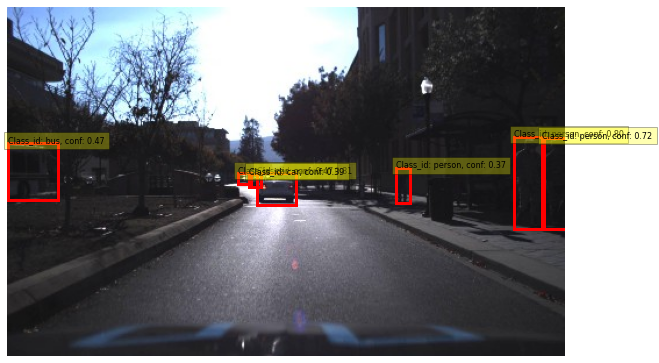

In [13]:
plt.figure(figsize=(10,8))
plt.imshow(image)
ax = plt.gca()
for idx, row in yolo_results.iterrows():
    xmin, xmax, ymin, ymax = row[['xmin', 'xmax', 'ymin', 'ymax']]
    ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red', linewidth=3))
    text = f'Class_id: {row["name"]}, conf: {row["confidence"]:.2f}'
    ax.text(xmin, ymin, text, fontsize=8, bbox=dict(facecolor='yellow', alpha=0.3))
plt.axis('off')
plt.show()